In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.chdir('../code')

In [3]:
from data import TGSSaltDataset
from data.transforms import TGSTransform, HShear
import pandas as pd
import matplotlib.pyplot as plt
import albumentations as A
import numpy as np
from utils.viz import plot_mask_on_img

In [4]:
root_ds = '../dataset'
train_df = pd.read_csv(os.path.join(root_ds, 'train.csv'))
nonaug_ds = TGSSaltDataset(root_ds, train_df, transforms=None)
aug_ds = TGSSaltDataset(root_ds, train_df, transforms=TGSTransform(augment=True, use_depth=False))

In [5]:
img, mask = nonaug_ds[0]
img = np.array(img)
mask = np.array(mask)

In [6]:
img

array([[ 87,  91,  95, ...,  89,  87,  86],
       [ 89,  95, 101, ...,  89,  89,  88],
       [ 96, 101, 105, ...,  89,  91,  89],
       ...,
       [ 42,  36,  36, ..., 102, 104, 105],
       [ 48,  44,  47, ..., 103, 105, 108],
       [ 52,  50,  52, ..., 104, 105, 109]], dtype=uint8)

In [7]:
mask

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [8]:
augs_options = {
    'HFlip':A.HorizontalFlip(p=1.0),
    'HShear':HShear((0.19, 0.2), p=1.0),
    'RandomResizedCrop':A.RandomResizedCrop(width=101, height=101, p=1.0),
    'RandomRotate':A.Rotate(limit=(14, 15), p=1.0),
    'RandomBrightnessContrast':A.RandomBrightnessContrast(brightness_limit=0.1, p=1.0),
}

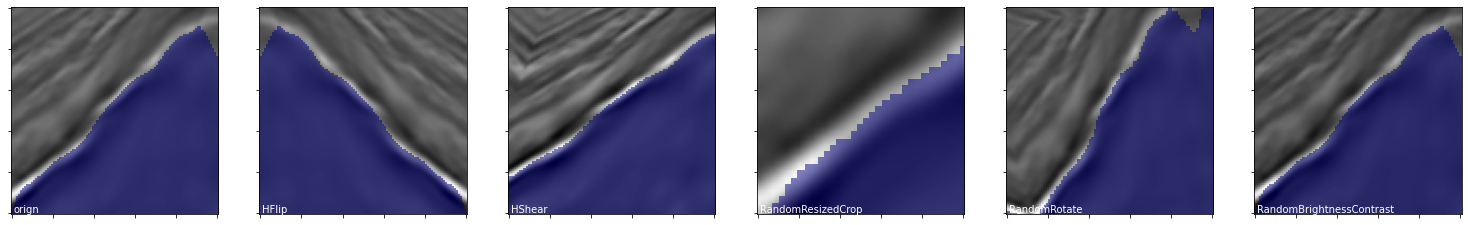

In [9]:
fig, axs = plt.subplots(1, len(augs_options) + 1, figsize=(5 * len(augs_options) + 1, 5))
plot_mask_on_img(axs[0], img, mask)
axs[0].text(1, 100, 'orign', color="white")
for i, (k, trans) in enumerate(augs_options.items()):
    aug = trans(image=img, mask=mask)
    plot_mask_on_img(axs[i + 1], aug['image'], aug['mask'])
    axs[i + 1].text(1, 100, k, color="white")

/home/user/.local/lib/python3.8/site-packages/matplotlib/image.py:443: UserWarning: Warning: converting a masked element to nan.
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
/home/user/.local/lib/python3.8/site-packages/matplotlib/image.py:444: UserWarning: Warning: converting a masked element to nan.
  vmid = np.float64(self.norm.vmin) + dv / 2


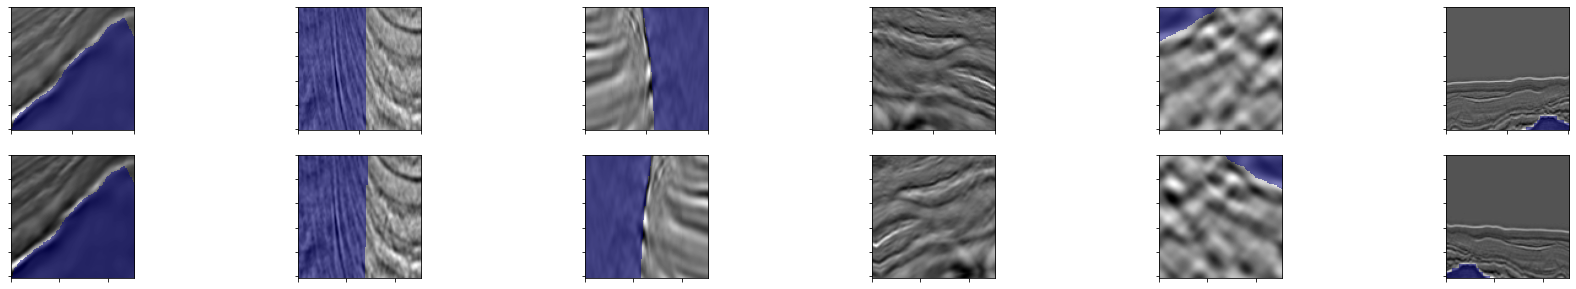

In [10]:
num_sample = 6
fig, axs = plt.subplots(2, num_sample, figsize=(5 * num_sample, 5))
for i in range(num_sample):
    img, mask = nonaug_ds[i]
    img = np.array(img)
    mask = np.array(mask)
    plot_mask_on_img(axs[0, i], img, mask)
    img_aug, mask_aug = aug_ds[i]
    plot_mask_on_img(axs[1, i], img_aug, mask_aug)